## **House Price Prediction on Ames housing dataset**

In this DATA*6100 project, we will be using Ames Housing Dataset to predict House Sale Price on the test dataset and minimise the RMSE. In order to improve our  prediction, we will data pre-processing and manipulation techniques to figure out how we can train the best performing Linear Regression Model .  

## Importing important libraries

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Importing training and testing data

We have two dataset named as follows:

1.   Housing_Data_Train.csv
2.   Housing_Data_Test.csv




In [94]:
from google.colab import files
uploaded = files.upload()

Saving Housing_Data_Train.csv to Housing_Data_Train (1).csv


In [95]:
#Read the dataset
df_train = pd.read_csv("Housing_Data_Train.csv")
df_train

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,149,20,RL,63.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,141000
1,1,460,50,RL,NaN,7015,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,110000
2,2,1336,20,RL,80.0,9650,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,167900
3,3,805,20,RL,75.0,9000,Pave,NaN,Reg,Lvl,...,0,NaN,GdWo,NaN,0,6,2006,WD,Family,118000
4,4,1396,60,RL,88.0,12665,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,281213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,912,20,RL,NaN,9286,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,143500
996,996,916,160,RM,21.0,2001,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,75000
997,997,399,30,RM,60.0,8967,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,11,2007,WD,Abnorml,67000
998,998,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,127000


In [96]:
from google.colab import files
uploaded = files.upload()

Saving Housing_Data_Test.csv to Housing_Data_Test (1).csv


In [97]:
df_test = pd.read_csv("Housing_Data_Test.csv")
df_test

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
1,1,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
2,2,18,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,Shed,500,10,2006,WD,Normal
3,3,19,20,RL,66.0,13695,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal
4,4,20,20,RL,70.0,7560,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,NaN,0,5,2009,COD,Abnorml
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,441,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
442,442,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
443,443,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
444,444,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


## **Data Pre-processing**

### Combinig both training and testing dataset

We will combine both the training and testing dataset to perform data pre processing together so that ahead when we select model for prediction and perfrom prediction we dont have to do pre processing again on test dataset

In [98]:
# Join both the datasets
df = pd.concat([df_train, df_test], axis=0).reset_index(drop=True)
df

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,149,20,RL,63.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,141000.0
1,1,460,50,RL,NaN,7015,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,110000.0
2,2,1336,20,RL,80.0,9650,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,167900.0
3,3,805,20,RL,75.0,9000,Pave,NaN,Reg,Lvl,...,0,NaN,GdWo,NaN,0,6,2006,WD,Family,118000.0
4,4,1396,60,RL,88.0,12665,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,281213.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1441,441,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,NaN
1442,442,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,NaN
1443,443,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,NaN
1444,444,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,NaN


### Visualizing the target column "SalePrice"

We will plot histogram to see how our target variable is to get a feel of what we are predicting

<Axes: xlabel='SalePrice', ylabel='Count'>

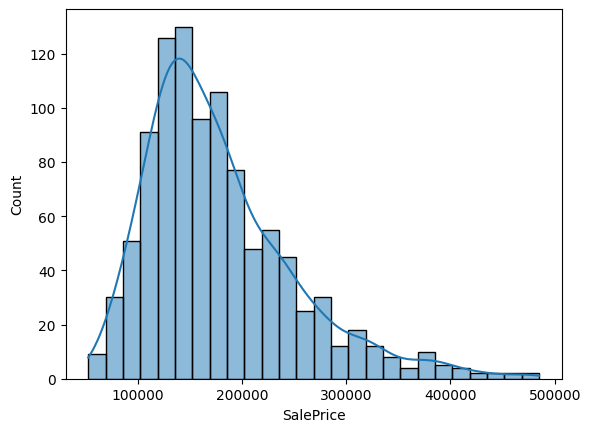

In [99]:
sns.histplot(df['SalePrice'],kde=True)

We can see out target variable is right skewed . So to remove skewness we can use log transforamtion but we wont use it now .

### Statistics and Visualization our combined dataset

In [100]:
df.describe()

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1446.000000,1446.000000,1446.000000,1187.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1438.000000,...,1446.000000,1446.000000,1446.000000,1446.00000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1000.000000
mean,414.062932,730.565698,57.026279,69.908172,10453.750346,6.090595,5.582988,1971.217151,1984.869986,100.876217,...,93.993084,46.217151,21.968188,3.44260,14.811203,2.401798,43.910097,6.329876,2007.813970,178403.271000
std,281.361403,422.340720,42.441191,24.122631,9931.633176,1.349390,1.112229,30.126214,20.585505,174.019316,...,124.801323,65.232413,61.205946,29.45708,55.431428,37.664404,498.502039,2.698667,1.327108,71476.841901
min,0.000000,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,2006.000000,52500.000000
25%,180.250000,364.250000,20.000000,59.000000,7536.250000,5.000000,5.000000,1954.000000,1967.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,5.000000,2007.000000,128987.500000
50%,361.000000,729.500000,50.000000,69.000000,9468.500000,6.000000,5.000000,1972.000000,1993.500000,0.000000,...,0.000000,24.000000,0.000000,0.00000,0.000000,0.000000,0.000000,6.000000,2008.000000,162000.000000
75%,637.750000,1096.750000,70.000000,80.000000,11522.500000,7.000000,6.000000,2000.000000,2004.000000,162.750000,...,168.000000,68.000000,0.000000,0.00000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,999.000000,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,857.000000,547.000000,552.000000,508.00000,480.000000,738.000000,15500.000000,12.000000,2010.000000,485000.000000


After seeing the statistics of test dataset we can see we have some unnecessary columns like 'Unnamed: 0' & 'Id' . We will remove them as they are of no use for prediction

In [101]:
# Drop unnecessary columns
df.drop(['Unnamed: 0','Id'],axis=1,inplace=True)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RL,63.0,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,141000.0
1,50,RL,NaN,7015,Pave,NaN,IR1,Bnk,AllPub,Corner,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,110000.0
2,20,RL,80.0,9650,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,167900.0
3,20,RL,75.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,6,2006,WD,Family,118000.0
4,60,RL,88.0,12665,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,281213.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1441,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,NaN
1442,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,NaN
1443,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,NaN
1444,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,NaN


Now we will plot histogram of numerical features to see how they are distributed, are there any missing values, etc.. In the histogrtam X-axis denoted numerical feature and Y-axis shows their count

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

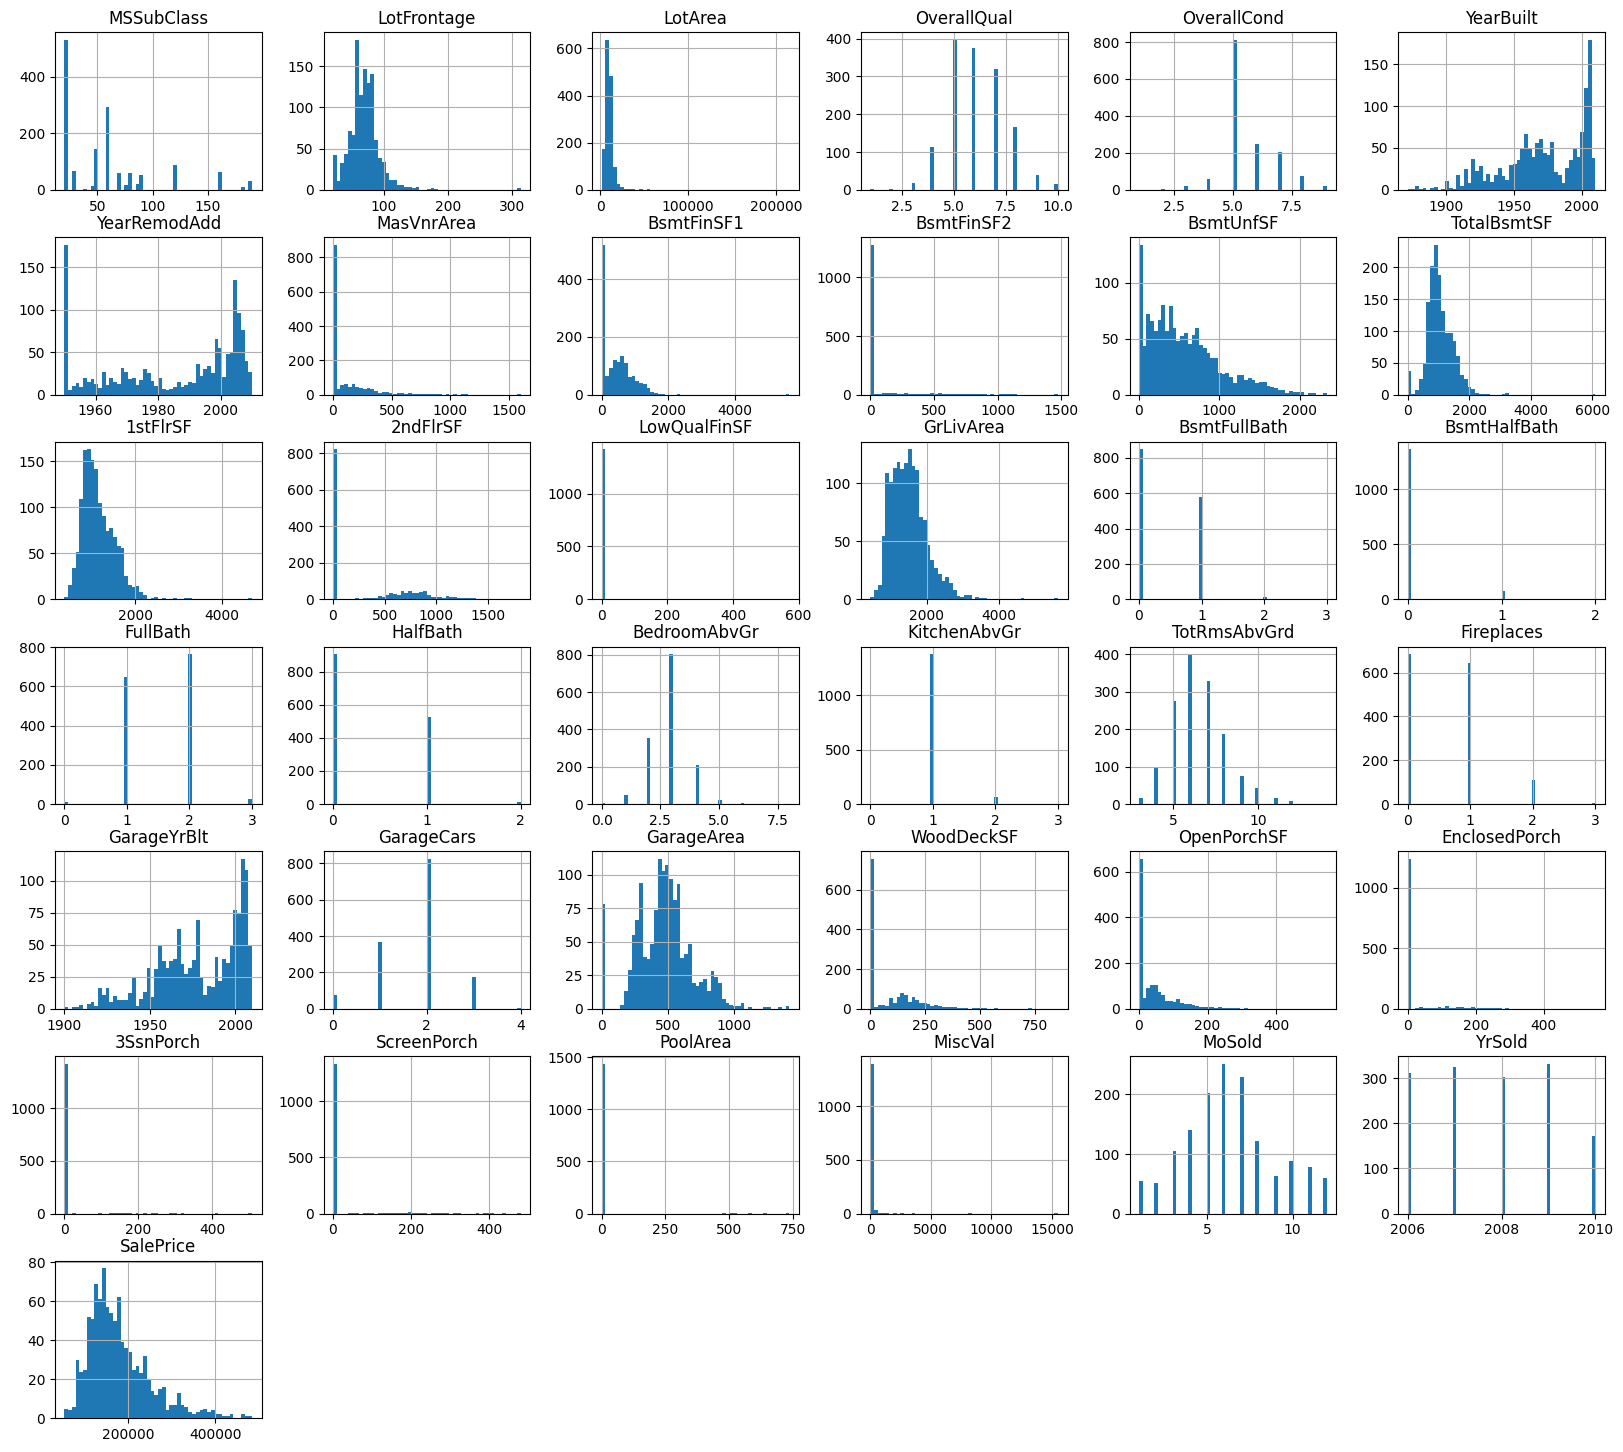

In [102]:
df.hist(bins=50, figsize=(20,18))

Looking at the histograms we can easily figure out that most of our data contains categorical values which we need to deal with, there are some missing values in the dataset as well as most of our data is skewed heavily. We will make decision on null values depending on the column type and its importance ahead.

### Handle Missing Values

Now since we know our data contains missing value lets see how many percent missing values are there in each column and then make a decision to remove that column or just impute mead media or mode in them

In [103]:
# Calculating percent of missing values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(20))

              Total    Percent
PoolQC         1440  99.585062
MiscFeature    1392  96.265560
Alley          1356  93.775934
Fence          1169  80.843707
MasVnrType      866  59.889350
FireplaceQu     685  47.372061
SalePrice       446  30.843707
LotFrontage     259  17.911480
GarageQual       78   5.394191
GarageType       78   5.394191
GarageYrBlt      78   5.394191
GarageFinish     78   5.394191
GarageCond       78   5.394191
BsmtFinType2     37   2.558783
BsmtExposure     37   2.558783
BsmtFinType1     36   2.489627
BsmtQual         36   2.489627
BsmtCond         36   2.489627
MasVnrArea        8   0.553250
Electrical        1   0.069156


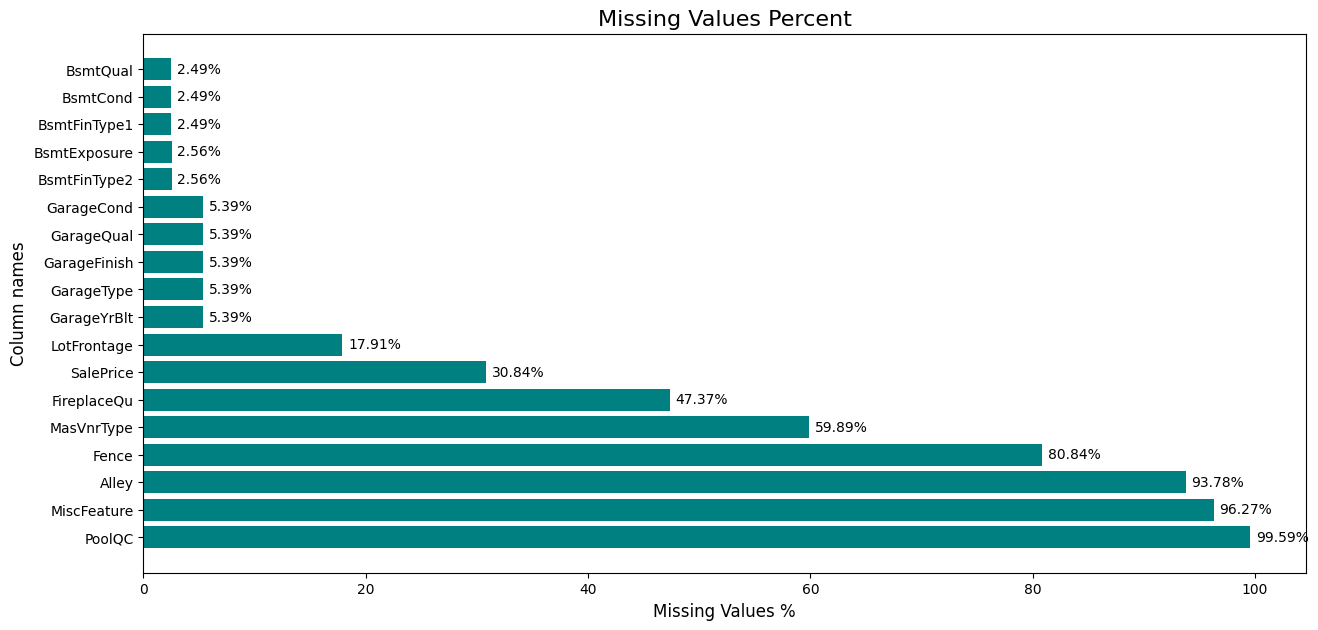

In [104]:
# Plot to visualize percent of missing values
percent = df.isnull().mean() * 100
percent = percent[percent > 1]
percent.sort_values(inplace=True)

# Plotting the missing data percentages
plt.figure(figsize=(15, 7))
bars = plt.barh(percent.index, percent.values, color='Teal')
plt.title('Missing Values Percent', fontsize=16)
plt.xlabel('Missing Values %', fontsize=12)
plt.ylabel('Column names', fontsize=12)
plt.gca().invert_yaxis()
for index, value in enumerate(percent.values):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center')
plt.show()


Looking at the table above we can some features have NaN values more than 99.5% this makes us think lets drop them since almost all are null but after careful inspection of data and looking at data description we can say that the categorical values who have NaN is because those house dont have that particular feature so removing them for me makes no sense like what if that feature is important feature to determine price of house we never know . So its better for now we fill those NaN values in categorical columns.

Note : We can see SalePrice also has NaN values which will make us think we need to replace them but remember SalePrice is target variable and the NaN values are present there because we need to predict them . So do not feel them

In [105]:
# Filling null values in Categorical columns with None
df['BsmtQual'].fillna("None", inplace=True)
df['BsmtCond'].fillna("None", inplace=True)
df['BsmtExposure'].fillna("None", inplace=True)
df['BsmtFinType1'].fillna("No", inplace=True)
df['BsmtFinType2'].fillna("No", inplace=True)
df['GarageType'].fillna("NG", inplace=True)
df['GarageFinish'].fillna("NG", inplace=True)
df['GarageQual'].fillna("None", inplace=True)
df['GarageCond'].fillna("None", inplace=True)
df['PoolQC'].fillna("None", inplace=True)
df['MiscFeature'].fillna("None", inplace=True)
df['Fence'].fillna("None", inplace=True)
df['Alley'].fillna("None", inplace=True)
df['MasVnrType'].fillna("None", inplace=True)
df['FireplaceQu'].fillna("None", inplace=True)

There are some numerical columns like 'MasVnrArea' , 'LotFrontage' that contain null values and here we simply cant put any random value. We have to put either mean, median, mode value but we will make this decision looking at the statistcs table we created using df.describe() previously.

We will fill "MasVnrArea" with 0 value because having null value in this column indicated "MasVnrType" for that particular house is No present so imputing mean, mode, median will be a wrong choice.

Similary for "GarageYrBlt" we will fill the null values with 0 because it indicates the house has no Garage so naturally garage year built will be 0.

We will impute null value in "Electrical" column with mode because it a categorical type column.

In [106]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)   #Since null values in MasVnrArea means there is null in MasVnrType so we fill it with 0
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])   #Since Electrical is categorical  fill them with mode
df['GarageYrBlt']=df['GarageYrBlt'].fillna(0)   #Since the house has no garage its GarageYrBlt must be 0

There are 259 null values in LotFrontage column we simply cannot impute any mean or median value because it can be an important feature. So we will fill the null values with mean based on Neighborhood because it represents part of street connected to the property and it varies from neighborhood to neighborhood

In [107]:
# Fill the null values in LotFrontage with mean based on Neighborhood
mean_LotFrontage = df.groupby('Neighborhood')['LotFrontage'].transform('mean')

# Replacing missing values in LotFrontage with the mean value for each neighbourhood
df['LotFrontage'] = df['LotFrontage'].fillna(mean_LotFrontage)

### Ordinal Encoding

There are columns like ExterQual, ExterCond, HeatingQC, KitchenQual, BsmtQual,BsmtCond, GarageQual, GarageCond, FireplaceQu, BsmtFinType1, BsmtFinType2, BsmtExposure which contain natural order so we will do ordinal encoding in them for our model to understand the features better

In [108]:
grading_features = ['ExterQual','ExterCond','HeatingQC','KitchenQual']
text_grades = ['Ex','Gd','TA','Fa','Po']
numerical_grading = [9,7,5,3,1]
gradingdictionary = dict(zip(['Ex','Gd','TA','Fa','Po'],[9,7,5,3,1]))
df[grading_features] = df[grading_features].replace(gradingdictionary)

In [109]:
grading_features2 = ['BsmtQual','BsmtCond','GarageQual','GarageCond','FireplaceQu']
text_grades2 = ['Ex','Gd','TA','Fa','Po','None']
numerical_grading2 = [9,7,5,3,1,0]
gradingdictionary2 = dict(zip(['Ex','Gd','TA','Fa','Po','None'],[9,7,5,3,1,0]))
df[grading_features2] = df[grading_features2].replace(gradingdictionary2)

In [110]:
grading_features3 = ['BsmtFinType1','BsmtFinType2']
text_grades3 = ['GLQ','ALQ','BLQ','Rec','LwQ','Unf','No']
numerical_grading3 = [6,5,4,3,2,1,0]
gradingdictionary3 = dict(zip(['GLQ','ALQ','BLQ','Rec','LwQ','Unf','No'],[6,5,4,3,2,1,0]))
df[grading_features3] = df[grading_features3].replace(gradingdictionary3)

In [111]:
grading_features4 = ['BsmtExposure']
text_grades4 = ['Gd','Av','Mn','No','None']
numerical_grading4 = [3,2,1,0,0]
gradingdictionary4 = dict(zip(['Gd','Av','Mn','No','None'],[3,2,1,0,0]))
df[grading_features4] = df[grading_features4].replace(gradingdictionary4)

### Converting datatypes of Columns

We notice there are columns like MoSold, YrSold & MsSubclass which are integer but they cannot be used as integer data type beacuse they can be an important feature for prediction. So we convert them into categorical type.

In [112]:
import calendar
df['MoSold'] = df['MoSold'].apply(lambda x: calendar.month_name[x])

In [113]:
df['MSSubClass'] = df['MSSubClass'].astype(str)
df['YrSold' ] = df['YrSold' ].astype(str)

### One Hot Encoding

We know majority of columns in our dataset are object datatype and these cannot be used directly to predict SalePrice . We first need to convert them into integer datatype so that our model can understand them. And for this purpose we will use One Hot Encoding to covert them into intger datatype

In [114]:
# Categorical columns
categorical_data = df.select_dtypes(include='object')
# Numerical Columns
numerical_data = df.select_dtypes(exclude='object')
# One-hot encoding
categorical_data = pd.get_dummies(categorical_data)
# Convert dummy columns
categorical_data = categorical_data.astype(int)
# Join categorical and numerical columns together
df = pd.concat([numerical_data, categorical_data], axis=1)
df

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,63.00,7500,7,5,2004,2005,120.0,5,5,7,...,0,0,0,1,0,0,0,0,1,0
1,57.66,7015,5,4,1950,1950,161.0,5,5,5,...,0,0,0,1,0,0,0,0,1,0
2,80.00,9650,6,5,1977,1977,360.0,5,5,7,...,0,0,0,1,0,0,0,0,1,0
3,75.00,9000,5,5,1954,1954,0.0,5,5,5,...,0,0,0,1,0,0,0,1,0,0
4,88.00,12665,8,5,2005,2006,245.0,7,5,7,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1441,62.00,7917,6,5,1999,2000,0.0,5,5,7,...,0,0,0,1,0,0,0,0,1,0
1442,85.00,13175,6,6,1978,1988,119.0,5,5,7,...,0,0,0,1,0,0,0,0,1,0
1443,66.00,9042,7,9,1941,2006,0.0,9,7,5,...,0,0,0,1,0,0,0,0,1,0
1444,68.00,9717,5,6,1950,1996,0.0,5,5,5,...,0,0,0,1,0,0,0,0,1,0


### Multi - Correlated features elimination

After one hot encoding we can see there are 279 columns all with integer datatype.

We can safely say after one hot encoding and since there are multiple columns there are always possiblities that multi collinearity might exist in the dataset which decreases model perfomance during prediciton. So we eliminate one feature from each pair of multi colinear columns

In [115]:
# List to store the highly correlated features
correlated_features = []

# Calculate pairwise correlation
for i in range(len(df.columns)):
  for j in range(i+1, len(df.columns)):
    first_feature = df.columns[i]
    second_feature = df.columns[j]
    pairwise_correlation = df[first_feature].corr(df[second_feature])

    # if the correlation is above 0.95, then add the pair to the correlated_features
    if abs(pairwise_correlation) > 0.95 :
      correlated_features.append((first_feature, second_feature))

    # List to store the feature which will be dropped
    drop_features = set()
    # From the pairwise highly correlated features, drop one of the features that has lower
    # Correlation with target 'SalePrice' variable
    for first_feature, second_feature in correlated_features :
      feature1_corr = df[first_feature].corr(df['SalePrice'])
      feature2_corr = df[second_feature].corr(df['SalePrice'])

      if(abs(feature1_corr) < abs(feature1_corr)):
        drop_features.add(first_feature)
      else:
        drop_features.add(second_feature)

In [116]:
# See the corelated features
correlated_features

[('GarageYrBlt', 'GarageType_NG'),
 ('GarageYrBlt', 'GarageFinish_NG'),
 ('PoolArea', 'PoolQC_None'),
 ('MSSubClass_190', 'BldgType_2fmCon'),
 ('MSSubClass_90', 'BldgType_Duplex'),
 ('Street_Grvl', 'Street_Pave'),
 ('Utilities_AllPub', 'Utilities_NoSeWa'),
 ('Exterior1st_CBlock', 'Exterior2nd_CBlock'),
 ('Exterior1st_CemntBd', 'Exterior2nd_CmentBd'),
 ('Exterior1st_MetalSd', 'Exterior2nd_MetalSd'),
 ('Exterior1st_VinylSd', 'Exterior2nd_VinylSd'),
 ('CentralAir_N', 'CentralAir_Y'),
 ('GarageType_NG', 'GarageFinish_NG'),
 ('MiscFeature_None', 'MiscFeature_Shed'),
 ('SaleType_New', 'SaleCondition_Partial')]

In [117]:
# Drop one feature from each pair of correated features
df = df.drop(drop_features, axis = 1)
df.shape

(1446, 265)

## **Splitting the dataset back into training and testing set**

After some preprocessing we again split our combined dataset into training and testing dataset

In [118]:
# Splitting the dataset back into training and testing
df_train = df.iloc[:1000]  # First 1000 rows for df_train
df_test = df.iloc[1000:]   # Remaining 446 rows for df_test
print(f'Training data shape : {df_train.shape}')
print(f'Test data shape : {df_test.shape}')

Training data shape : (1000, 265)
Test data shape : (446, 265)


## **Handling outliers in training dataset before training the model**

First we find out features that are highly correlated with SalePrice to remove the outliers so the positive impact on model is significant

In [119]:
df_train.corr()['SalePrice'].sort_values(ascending = False)

,SalePrice
SalePrice,1.000000
OverallQual,0.796024
ExterQual,0.678897
GarageCars,0.668395
KitchenQual,0.666980
...,...
Condition2_RRAe,NaN
Condition2_RRAn,NaN
Condition2_RRNn,NaN
RoofStyle_Shed,NaN


Now from above table we can see that OverallQual, ExterQual & GarageCars have significantly higher correlation with SalePrice so we must remove their outlers using LOF(Local Outlier Function)

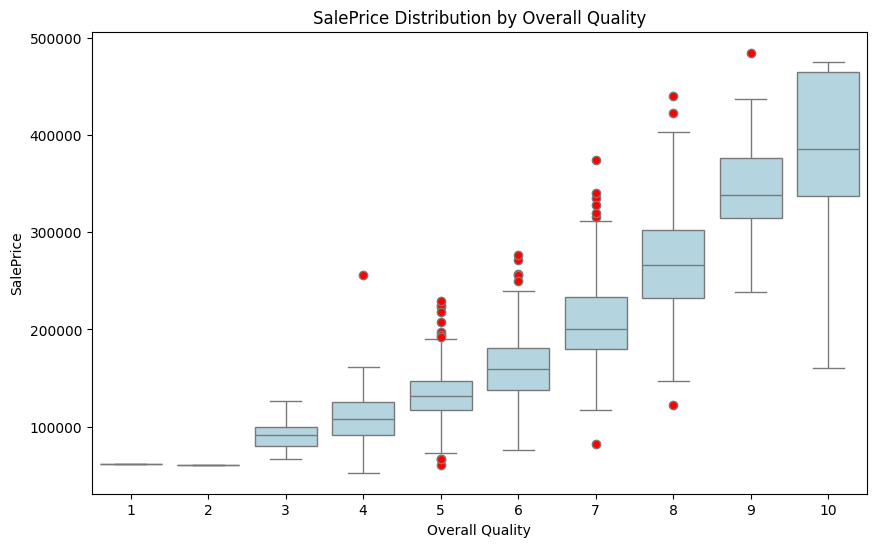

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Define the properties for the outliers (fliers)
flierprops = dict(marker='o', markerfacecolor='red', markersize=6, linestyle='none')

# Create the boxplot with customized outliers
sns.boxplot(data=df_train, x='OverallQual', y='SalePrice', color="lightblue", flierprops=flierprops)

plt.title("SalePrice Distribution by Overall Quality")
plt.xlabel("Overall Quality")
plt.ylabel("SalePrice")
plt.show()



In [121]:
# Removing the outliers from the OverallQual Feature
df_train= df_train[~ ((df_train['OverallQual'] == 9) & (df_train['SalePrice'] > 450000)) &
        ~ ((df_train['OverallQual'] == 8) & (df_train['SalePrice'] > 400000)) &
        ~ ((df_train['OverallQual'] == 8) & (df_train['SalePrice'] < 150000)) &
        ~ ((df_train['OverallQual'] == 7) & (df_train['SalePrice'] > 320000)) &
        ~ ((df_train['OverallQual'] == 7) & (df_train['SalePrice'] < 100000)) &
        ~ ((df_train['OverallQual'] == 6) & (df_train['SalePrice'] > 250000)) &
        ~ ((df_train['OverallQual'] == 5) & (df_train['SalePrice'] > 200000)) &
        ~ ((df_train['OverallQual'] == 4) & (df_train['SalePrice'] > 200000))]

Now we use Local Outlier Factor detection algorithm to find outliers in the training dataset and remove them to improve performace of out model during training.

LOF will check density of each data point compared to its 15 nearest neighbors. If a point is significantly less dense than its neighbors, it is flagged as an outlier and subsequently removed from the dataset.

In [122]:
from sklearn.neighbors import LocalOutlierFactor
# Creating the model for oulier detecting
clf = LocalOutlierFactor (n_neighbors= 15,)
# Fitting the model & make prediction
y_predict = clf.fit_predict(df_train)
# Identifying the outliers
outliers = df_train[y_predict == -1]
# Remove the outliers
df_train = df_train.drop(outliers.index, axis =0)

In [123]:
df_train.shape

(912, 265)

## **Modelling and Model Tunning**

Now we are done with all the Data Pre processing and the dataset is ready for feature selection, training and testing.

We will use OLS for feature selection

### Forward Feature Selection

Forward Feature Selection is a feature selection technique that iteratively builds a model by adding one feature at a time, selecting the feature that maximizes model performance. It starts with  0 features, add feature one by one and test the RMSE on the train set itself. From this we will select a set a features who minimize our RMSE as much as possible depending on all the other feature set



In [124]:
# Split the training data into X & Y
X=df_train.drop('SalePrice',axis=1)
Y=df_train['SalePrice']

In [125]:
# This code was provided by Mihai Nica sir on DATA*6100 Github
import statsmodels.api as sm
from itertools import combinations
def processSubset(feature_set, X_train, y_train, X_test, y_test):
    # Fit model on feature_set and calculate RMSE
    model = sm.OLS(y_train,X_train[list(feature_set)])
    regr = model.fit()
    RMSE = float(np.sqrt(np.mean((regr.predict(X_test[list(feature_set)]) - y_test)**2)))
    return {'p':len(feature_set),'features':feature_set, 'model':regr, 'RMSE':RMSE}

# function to perform forward selection to identify the best predictors
def forward(predictors, X_train, y_train, X_test, y_test):

    # to keep track of predictors that have not been included in the model yet
    remaining_predictors = [p for p in X_train.columns if p not in predictors]

    results = []

    for p in remaining_predictors:
        results.append(processSubset(predictors+[p], X_train, y_train, X_test, y_test))

    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)

    # Choose the model with the lowest RMSE
    best_model = models.loc[models['RMSE'].argmin()]

    # Return the best model, along with some other useful information about the model
    return best_model

In [126]:
# This code was provided by Mihai Nica sir on DATA*6100 Github
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=3)

In [127]:
# This code was provided by Mihai Nica sir on DATA*6100 Github
# Initialize a DataFrame to store the results of the training model with specified columns
models_train = pd.DataFrame(columns=['p','RMSE','features', 'model'])

# List to keep track of currently selected predictors
predictors = []

# Iterate through range of column to test features and find best set of predictor with those of the best model found in the current iteration
for i in range(1,len(X.columns)+1):
    models_train.loc[i] = forward(predictors,X_train,y_train,X_test,y_test)
    predictors = models_train.loc[i]['model'].model.exog_names #update the list of predictors to include the predictors of the best model found in the current iteration

In [128]:
models_train

,p,RMSE,features,model
1,1,40321.40955,[OverallQual],<statsmodels.regression.linear_model.Regressio...
2,2,36127.251492,"[OverallQual, SaleType_WD]",<statsmodels.regression.linear_model.Regressio...
3,3,32770.751816,"[OverallQual, SaleType_WD, GrLivArea]",<statsmodels.regression.linear_model.Regressio...
4,4,29125.043489,"[OverallQual, SaleType_WD, GrLivArea, BsmtFinSF1]",<statsmodels.regression.linear_model.Regressio...
5,5,27179.262142,"[OverallQual, SaleType_WD, GrLivArea, BsmtFinS...",<statsmodels.regression.linear_model.Regressio...
...,...,...,...,...
260,260,22345.53945,"[OverallQual, SaleType_WD, GrLivArea, BsmtFinS...",<statsmodels.regression.linear_model.Regressio...
261,261,22328.336657,"[OverallQual, SaleType_WD, GrLivArea, BsmtFinS...",<statsmodels.regression.linear_model.Regressio...
262,262,22460.342906,"[OverallQual, SaleType_WD, GrLivArea, BsmtFinS...",<statsmodels.regression.linear_model.Regressio...
263,263,22826.314167,"[OverallQual, SaleType_WD, GrLivArea, BsmtFinS...",<statsmodels.regression.linear_model.Regressio...


In [129]:
# Covert RMSE column to numeric
models_train['RMSE'] = models_train['RMSE'].astype(float)

# Find the minimum RMSE value and the corresponding index
min_rmse = models_train['RMSE'].min()
min_rmse_index = models_train['RMSE'].idxmin()
print(f'Minimum RMSE: {min_rmse:.2f}\nNumber of features: {min_rmse_index}')

Minimum RMSE: 14025.34
Number of features: 135


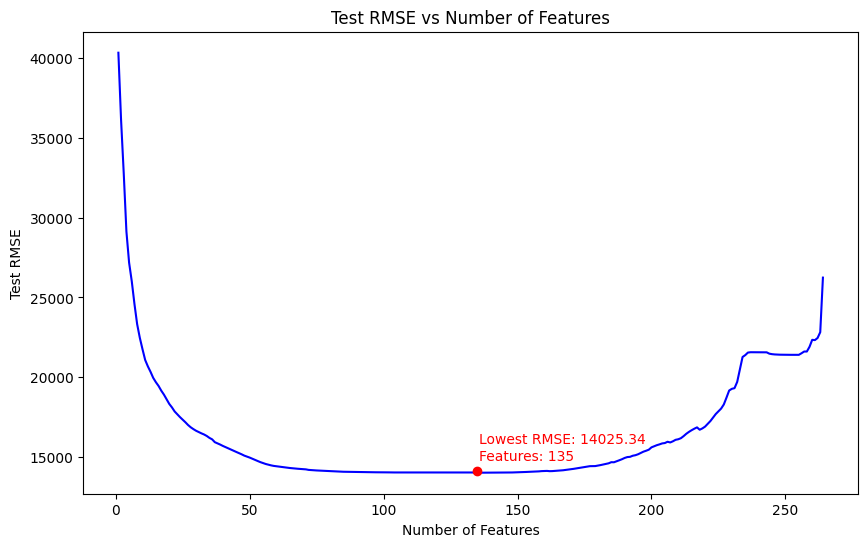

In [130]:
rmse_values = models_train['RMSE']
num_predictors = list(range(1, len(rmse_values) + 1))

min_rmse = rmse_values.min()
min_rmse_index = rmse_values.idxmin()

plt.figure(figsize=(10, 6))
plt.plot(num_predictors, rmse_values, label='Test RMSE', color='blue')

# Highlighting the minimum RMSE point with a slight offset for visibility
plt.scatter([min_rmse_index], [min_rmse + 100], color='red', zorder=5)
plt.text(min_rmse_index + 0.5, min_rmse + 800, f'Lowest RMSE: {min_rmse:.2f}\nFeatures: {min_rmse_index}',
         color='red', fontsize=10)

# Labeling the plot
plt.xlabel('Number of Features')
plt.ylabel('Test RMSE')
plt.title('Test RMSE vs Number of Features')
plt.show()



### Using the entire training dataset

Now once we got the initial number of features required to get the minimum RMSE(135) we will again apply Forward Feature selection on the entire training dataset without splitting it into train and testing.

In this way we will get the exact 135 features which minimize our RMSE and use them for prediction of house prices on df_test

In [131]:
# This code was provided by Mihai Nica sir on DATA*6100 Github
models_withNoTest = pd.DataFrame(columns=['p','RMSE','features', 'model'])

# List to keep track of currently selected predictors
predictors = []

# Iterate through range of column to test features and find best set of predictor with those of the best model found in the current iteration
for i in range(1,len(X.columns)+1):
    models_withNoTest.loc[i] = forward(predictors, X, Y, X, Y)
    predictors = models_withNoTest.loc[i]['model'].model.exog_names
models_withNoTest['RMSE'] = models_withNoTest['RMSE'].astype(float)

# Find the minimum RMSE value and the corresponding index
min_rmse = models_withNoTest['RMSE'].min()
min_rmse_index = models_withNoTest['RMSE'].idxmin()
print(f'Minimum RMSE: {min_rmse:.2f}\nNumer of Features: {min_rmse_index}')

Minimum RMSE: 15332.84
Numer of Features: 239


In [132]:
models_withNoTest

,p,RMSE,features,model
1,1,40489.706336,[OverallQual],<statsmodels.regression.linear_model.Regressio...
2,2,36724.497965,"[OverallQual, GarageArea]",<statsmodels.regression.linear_model.Regressio...
3,3,33660.580337,"[OverallQual, GarageArea, GarageType_Detchd]",<statsmodels.regression.linear_model.Regressio...
4,4,31194.769639,"[OverallQual, GarageArea, GarageType_Detchd, G...",<statsmodels.regression.linear_model.Regressio...
5,5,29144.653628,"[OverallQual, GarageArea, GarageType_Detchd, G...",<statsmodels.regression.linear_model.Regressio...
...,...,...,...,...
260,260,15332.841885,"[OverallQual, GarageArea, GarageType_Detchd, G...",<statsmodels.regression.linear_model.Regressio...
261,261,15332.841885,"[OverallQual, GarageArea, GarageType_Detchd, G...",<statsmodels.regression.linear_model.Regressio...
262,262,15332.841885,"[OverallQual, GarageArea, GarageType_Detchd, G...",<statsmodels.regression.linear_model.Regressio...
263,263,15332.841885,"[OverallQual, GarageArea, GarageType_Detchd, G...",<statsmodels.regression.linear_model.Regressio...


In [133]:
# View the best 135 features
features = sorted(models_withNoTest.loc[135, 'model'].model.exog_names)
print(features)

['1stFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BldgType_1Fam', 'BldgType_Twnhs', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtQual', 'Condition1_Artery', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_RRAe', 'Condition2_PosN', 'Electrical_FuseF', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st_AsbShng', 'Exterior1st_BrkFace', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_AsbShng', 'Exterior2nd_AsphShn', 'Exterior2nd_BrkFace', 'Exterior2nd_HdBoard', 'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_Wd Shng', 'Fence_GdPrv', 'Fireplaces', 'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'FullBath', 'Functional_Maj2', 'Functional_Min1', 'Functional_Mod', 'Functional_Typ', 'GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish_Fin', 'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageType_2Types', 

These are the features best features we got after forward selection which minimize our RMSE

Now we will plot out Train RMSE to see how it behaves with the increasing number of features

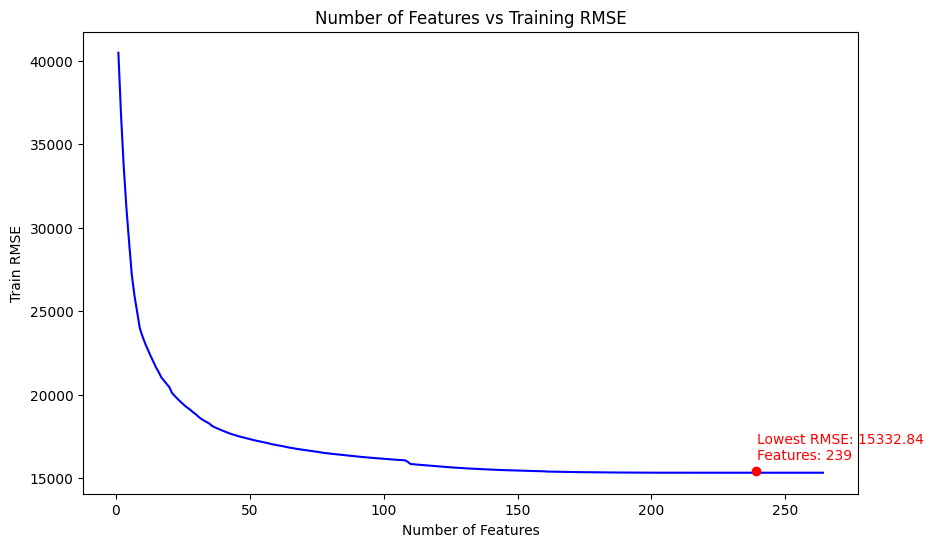

In [134]:
rmse_values = models_withNoTest['RMSE']
num_predictors = list(range(1, len(rmse_values) + 1))

# Find the minimum RMSE value and the corresponding index
min_rmse = rmse_values.min()
min_rmse_index = rmse_values.idxmin()

# Plotting RMSE vs Number of Predictors
plt.figure(figsize=(10, 6))
plt.plot(num_predictors, rmse_values, label='Train RMSE', color='blue')

# Highlighting the minimum RMSE point with a slight offset for visibility
plt.scatter([min_rmse_index], [min_rmse + 100], color='red', zorder=5)
plt.text(min_rmse_index + 0.5, min_rmse + 800, f'Lowest RMSE: {min_rmse:.2f}\nFeatures: {min_rmse_index}',
         color='red', fontsize=10)

# Labeling the plot
plt.xlabel('Number of Features')
plt.ylabel('Train RMSE')
plt.title('Number of Features vs Training RMSE')
plt.show()



## **Demonstration of underfitting and overfitting**

In machine learning, overfitting occurs when an algorithm fits too closely or even exactly to its training data, resulting in a model that can’t make accurate predictions or conclusions from any data other than the training data.

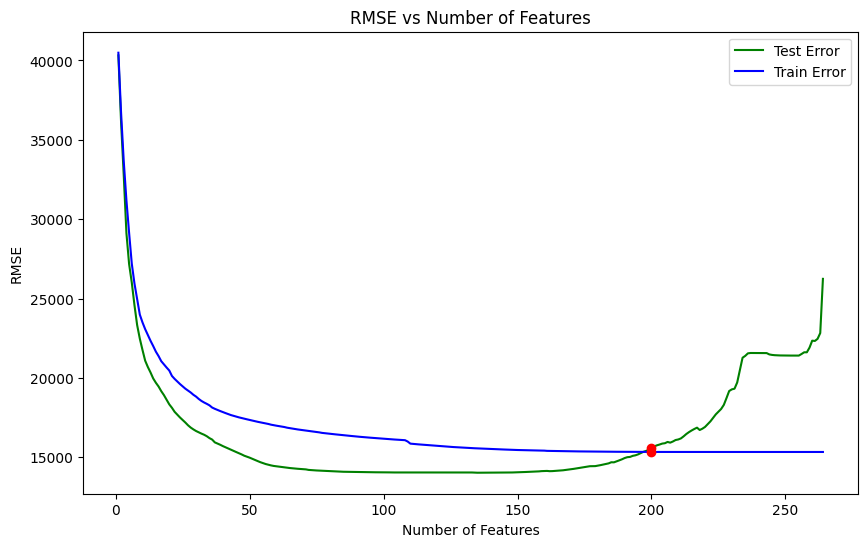

In [135]:
# Overfitting with high number of features
number_of_features = 200
plt.figure(figsize=(10, 6))

plt.plot(models_train['RMSE'], color='green', label='Test Error')
plt.plot(number_of_features, models_train['RMSE'].loc[number_of_features], 'or')
plt.plot(models_withNoTest['RMSE'], color='blue', label='Train Error')
plt.plot(number_of_features, models_withNoTest['RMSE'].loc[number_of_features], 'or')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.legend()
plt.title('RMSE vs Number of Features')
plt.show()


From the graphs we can say that RMSE decreases steadily as the number of features increases, indicating that
the model fits the training data better with more features. This can lead to overfitting if the model becomes too
complex. As more features are added, indicating an improvement in model performance. However, after
reaching a certain point the test error starts to increase, suggesting overfitting. So in summary the graph suggests
adding more featured improves the model but after certain number of features it starts overfitting.  
The main observation from this plot is that adding more features improves performance up to a point, but then
starts to degrade test performance, indicating overfitting.  


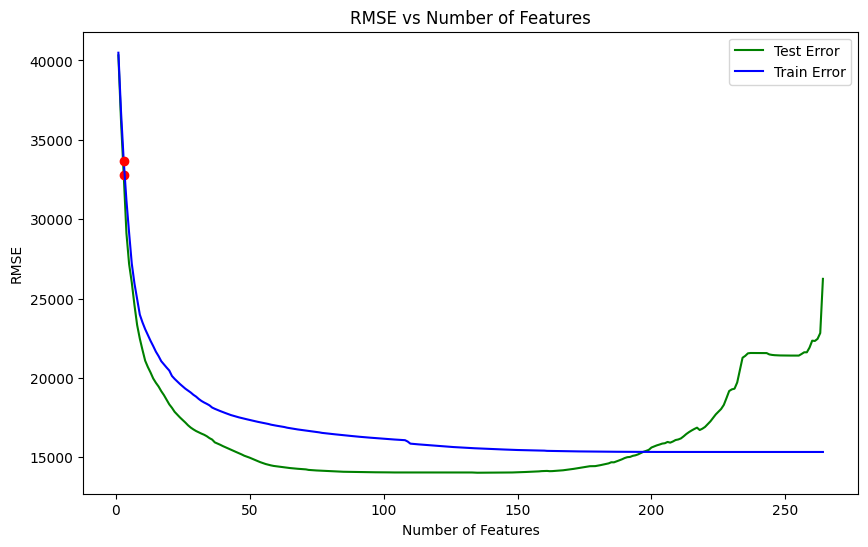

In [136]:
# Underfitting with having low number of features
number_of_features = 3
plt.figure(figsize=(10, 6))

plt.plot(models_train['RMSE'], color='green', label='Test Error')
plt.plot(number_of_features, models_train['RMSE'].loc[number_of_features], 'or')
plt.plot(models_withNoTest['RMSE'], color='blue', label='Train Error')
plt.plot(number_of_features, models_withNoTest['RMSE'].loc[number_of_features], 'or')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.legend()
plt.title('RMSE vs Number of Features')
plt.show()



Underfitting in machine learning occurs when a model is too simple to capture the underlying patterns in the data. This results in poor performance on both the training and test datasets because the model cannot generalize well to new data. Underfitting usually happens when the model has insufficient complexity or when it fails to learn the relationships in the data properly.

From the plot , we can see that when number of features is 10, the model is underfitted which results in high error in both test and test dataset.

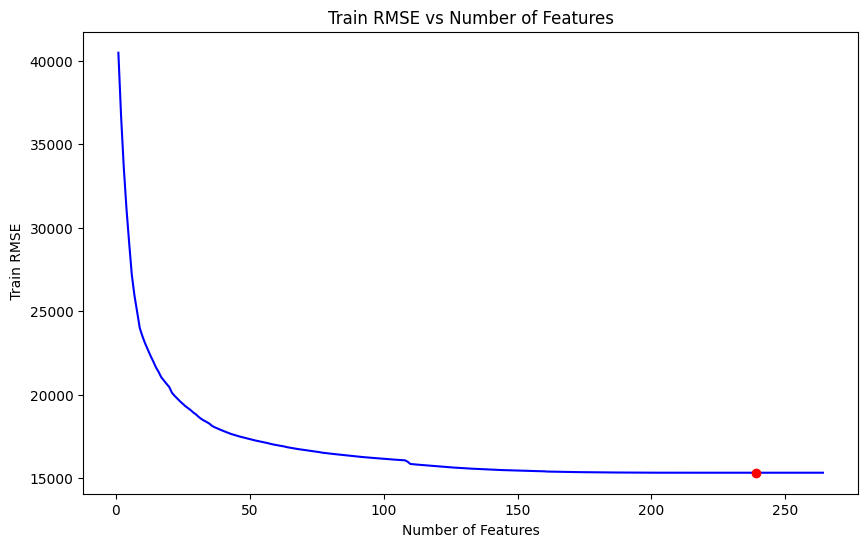

In [145]:
# Plotting rmse for train dataset vs number of features
plt.figure(figsize=(10, 6))
plt.plot(models_withNoTest['RMSE'], color='blue', label='RMSE')  # Removed 'ob'
plt.xlabel('Number of Features')
plt.ylabel(' Train RMSE')
plt.plot(models_withNoTest['p'][models_withNoTest['RMSE'].idxmin()], models_withNoTest['RMSE'].min(), 'or')
plt.title('Train RMSE vs Number of Features')
plt.show()


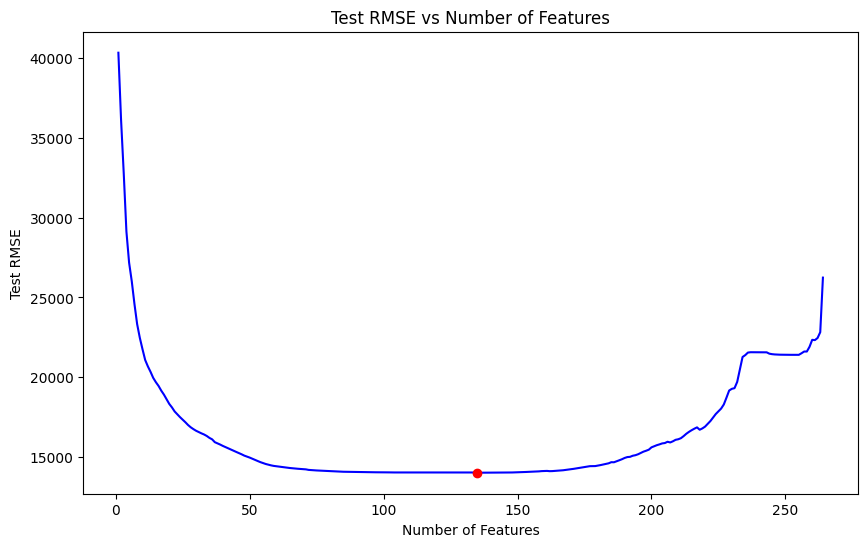

In [146]:
# Generate a plot for RMSE value for test data vs Number of features
plt.figure(figsize=(10, 6))
plt.plot(models_train['RMSE'], color='blue', label='RMSE')  # Removed 'ob'
plt.xlabel('Number of Features')
plt.ylabel('Test RMSE')
plt.plot(models_train['p'][models_train['RMSE'].idxmin()], models_train['RMSE'].min(), 'or')
plt.title('Test RMSE vs Number of Features')
plt.show()


The U-shaped curve shown in the graph represents how the number of features in the model impact the RMSE
for the test dataset, which indicates the error in predicting housing prices. At the left end of the curve, where the
number of features is very low, the model is too simple to effectively learn the underlying relationships in the
data. This results in high test error due to high bias, meaning the model fails to capture important patterns and
trends, leading to poor performance on both training and test data.  
As more feature are added, the RMSE error decreases. This is the improvement phase which can be seen in the
decreasing test error, as adding more features allows the model to make more accurate predictions.  
The red dot shows the point where the test error is at its minimum, showing the best number of features for this
model. At this stage, the model achieves the best balance between complexity and generalization ability, with
the lowest RMSE on the test dataset. After a few more features the test error starts to  rise again, leading to
overfitting.  
In an overfitted model, the training error is typically low, but the test error is high because model cannot
generalize efficiently whereas in underfitted model both the training error and testing error is high due to high
bias.  
So as we go from overfitting to underfitting, generalization gap decreases.

## **Predicting on Test Dataset**

Now on looking back on what we have learned for training our model we will apply it on our df_test to predict "SalePrice" of houses.

We will be using a Linear Regression model taught in class.

A linear regression model is a supervised learning algorithm in machine learning that aims to model the relationship between the target variable (i.e.  SalePrice in our case ) and one or more independent variables (i.e. 135 features selected through forward selection) by fitting a linear equation to the data.

In [139]:
#Do a linear fit using only the LotArea
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
X = df_train[['1stFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BldgType_1Fam', 'BldgType_Twnhs', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtQual', 'Condition1_Artery', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_RRAe', 'Condition2_PosN', 'Electrical_FuseF', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st_AsbShng', 'Exterior1st_BrkFace', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_AsbShng', 'Exterior2nd_AsphShn', 'Exterior2nd_BrkFace', 'Exterior2nd_HdBoard', 'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_Wd Shng', 'Fence_GdPrv', 'Fireplaces', 'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'FullBath', 'Functional_Maj2', 'Functional_Min1', 'Functional_Mod', 'Functional_Typ', 'GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish_Fin', 'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageType_2Types', 'GarageType_Detchd', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'HeatingQC', 'Heating_GasW', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_SLvl', 'KitchenAbvGr', 'KitchenQual', 'LandContour_HLS', 'LandContour_Low', 'LandSlope_Sev', 'LotArea', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotShape_IR1', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_90', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RL', 'MasVnrArea', 'MasVnrType_BrkCmn', 'MiscFeature_None', 'MiscFeature_TenC', 'MoSold_April', 'MoSold_July', 'MoSold_May', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'PoolQC_Gd', 'RoofStyle_Gable', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand', 'SaleType_COD', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_New', 'SaleType_Oth', 'ScreenPorch', 'TotalBsmtSF', 'Utilities_AllPub', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold_2009']]
y = df_train['SalePrice']

model = LinearRegression()
model.fit(X,y) #this fits the model

LinearRegression()

In [140]:
#Predict on the test set
X =df_test[['1stFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BldgType_1Fam', 'BldgType_Twnhs', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtQual', 'Condition1_Artery', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_RRAe', 'Condition2_PosN', 'Electrical_FuseF', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st_AsbShng', 'Exterior1st_BrkFace', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_AsbShng', 'Exterior2nd_AsphShn', 'Exterior2nd_BrkFace', 'Exterior2nd_HdBoard', 'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_Wd Shng', 'Fence_GdPrv', 'Fireplaces', 'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'FullBath', 'Functional_Maj2', 'Functional_Min1', 'Functional_Mod', 'Functional_Typ', 'GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish_Fin', 'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageType_2Types', 'GarageType_Detchd', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'HeatingQC', 'Heating_GasW', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_SLvl', 'KitchenAbvGr', 'KitchenQual', 'LandContour_HLS', 'LandContour_Low', 'LandSlope_Sev', 'LotArea', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotShape_IR1', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_90', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RL', 'MasVnrArea', 'MasVnrType_BrkCmn', 'MiscFeature_None', 'MiscFeature_TenC', 'MoSold_April', 'MoSold_July', 'MoSold_May', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'PoolQC_Gd', 'RoofStyle_Gable', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand', 'SaleType_COD', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_New', 'SaleType_Oth', 'ScreenPorch', 'TotalBsmtSF', 'Utilities_AllPub', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold_2009']]
predictions = model.predict(X)

#convert the predictions to a LIST of POSITIVE INTEGERS (do not submit decimals!)
list_predictions = predictions.tolist()
rounded_list_predictions = [int(x) for x in list_predictions]
print(rounded_list_predictions)

[211454, 154029, 124218, 132579, 136417, 267503, 61554, 190493, 148671, 143979, 145241, 276825, 268139, 183659, 160919, 421814, 122789, 167669, 220213, 60829, 113899, 189580, 160855, 190679, 131574, 115338, 191919, 192045, 180427, 122619, 122044, 149977, 322781, 247359, 172323, 171991, 121304, 143481, 222675, 218544, 158193, 171553, 204079, 110061, 126939, 103304, 117664, 236072, 299479, 182543, 280940, 148375, 142648, 203920, 163413, 171287, 112042, 184068, 137247, 125778, 102080, 89321, 156384, 129085, 218335, 243572, 187673, 218111, 272286, 93887, 213004, 256457, 78212, 234291, 191546, 220390, 114214, 195812, 120881, 158694, 140722, 166035, 243656, 253464, 127220, 255431, 266234, 141927, 282180, 169325, 165334, 185764, 333285, 154954, 146861, 91380, 124581, 214337, 156028, 56098, 181607, 123698, 289254, 145044, 119943, 109758, 206542, 137331, 272968, 347056, 210579, 209680, 89124, 155779, 108202, 135208, 146477, 225954, 266821, 291221, 251162, 225413, 305919, 143595, 108706, 203094,

## **Final Model**

So the final model contains 135 features which give minimum RMSE on test data

The TEST RMSE submitted on leaderboard is : **21195**

In [141]:
#print the features of the best model
features

['1stFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BldgType_1Fam',
 'BldgType_Twnhs',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtQual',
 'Condition1_Artery',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_RRAe',
 'Condition2_PosN',
 'Electrical_FuseF',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Exterior1st_AsbShng',
 'Exterior1st_BrkFace',
 'Exterior1st_CemntBd',
 'Exterior1st_HdBoard',
 'Exterior1st_Stucco',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'Exterior2nd_AsbShng',
 'Exterior2nd_AsphShn',
 'Exterior2nd_BrkFace',
 'Exterior2nd_HdBoard',
 'Exterior2nd_Other',
 'Exterior2nd_Plywood',
 'Exterior2nd_Wd Shng',
 'Fence_GdPrv',
 'Fireplaces',
 'Foundation_BrkTil',
 'Foundation_CBlock',
 'Foundation_PConc',
 'Foundation_Slab',
 'Foundation_Stone',
 'Foundation_Wood',
 'FullBath',
 'Functional_Maj2',
 'Functional_Min1',
 'Functional_Mod',
 'Functional_Typ',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish_Fin',
 'GarageFin